This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Heuristic clutter detection based on distribution properties ("histo cut")

Detects areas with anomalously low or high average reflectivity or precipitation. It is recommended to use long term average or sums (months to year).

In [1]:
import wradlib.clutter as clutter
from wradlib.vis import plot_ppi
import wradlib.util as util
import numpy as np
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

### Load annual rainfall acummulation example (from DWD radar Feldberg)

In [2]:
filename = util.get_wradlib_data_file('misc/annual_rainfall_fbg.gz')
yearsum = np.loadtxt(filename)

### Apply histo-cut filter to retrieve boolean array that highlights clutter as well as beam blockage

In [3]:
mask = clutter.histo_cut(yearsum)

### Plot results

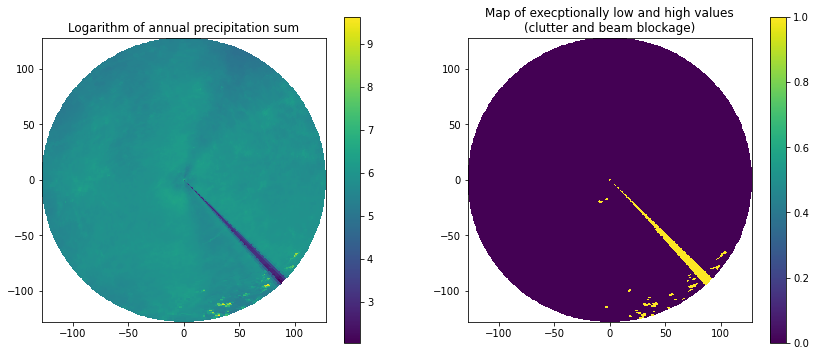

In [4]:
fig = pl.figure(figsize=(14,8))
ax = fig.add_subplot(121)
ax, pm = plot_ppi(np.log(yearsum), ax=ax)
pl.title("Logarithm of annual precipitation sum")
pl.colorbar(pm, shrink=0.75)
ax = fig.add_subplot(122)
ax, pm = plot_ppi(mask.astype(np.uint8), ax=ax)
pl.title("Map of execptionally low and high values\n(clutter and beam blockage)")
pl.colorbar(pm, shrink=0.75)